## Setup environment

Deconvolution napari is an extension of developmental biology napari but requires the jupyter notebook extension and a couple of experimental libraries.

We could just add these to devbio-napari but it's good practice to install experimental libraries in a new environment. 

    conda create --name decon-napari python=3.9
    conda activate decon-napari
    conda install -c conda-forge jupyterlab
    conda install -c conda-forge pyopencl==2021.2.6 hdbscan numba=0.55.1
    pip install devbio-napari
    conda install -c conda-forge fftw
    pip install napari-sdeconv
    
    pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python
    pip install --index-url https://test.pypi.org/simple/ --no-deps clij2-fft
    

Mac-users please also install this:

    conda install -c conda-forge ocl_icd_wrapper_apple

Linux users please also install this:

    conda install -c conda-forge ocl-icd-system


## Get and open test images

1.  Get images from this folder https://www.dropbox.com/sh/v3g5zln64e0uhk7/AABcYksPoawlTBO9ELCyqfPOa?dl=0
2.  In the code snippet below change ```im_path``` to the local location on your machine where you put the above folder
3.  Use imread to verify you can open the image, then pring the size of the image and verify it is is ```(128,256,256)```


In [1]:
from skimage.io import imread

im_path='D:/images/i2k2022/deconvolution/'
im_name='Bars-G10-P30-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

im=imread(im_path+im_name)
psf=imread(im_path+psf_name)
truth=imread(im_path+truth_name)
im=im.astype('float32')
psf=psf.astype('float32')
psf=psf/psf.sum()
print(im.shape, psf.shape, truth.shape)

(128, 256, 256) (128, 256, 256) (128, 256, 256)


## View 3D Data in notebook

View the data using xy, xz, and zy max projections.  

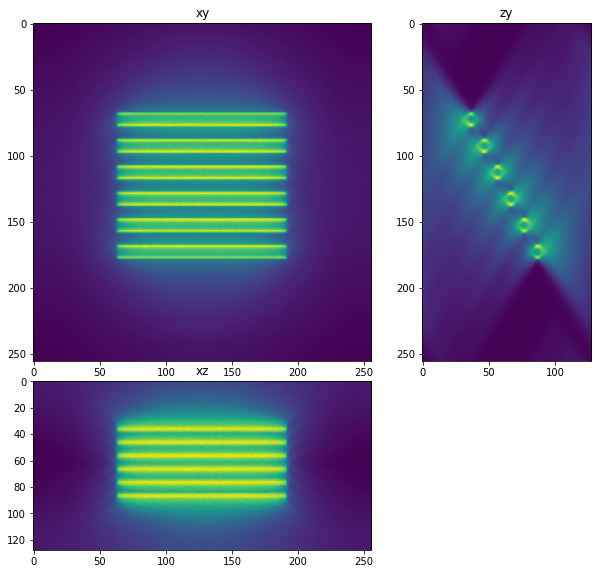

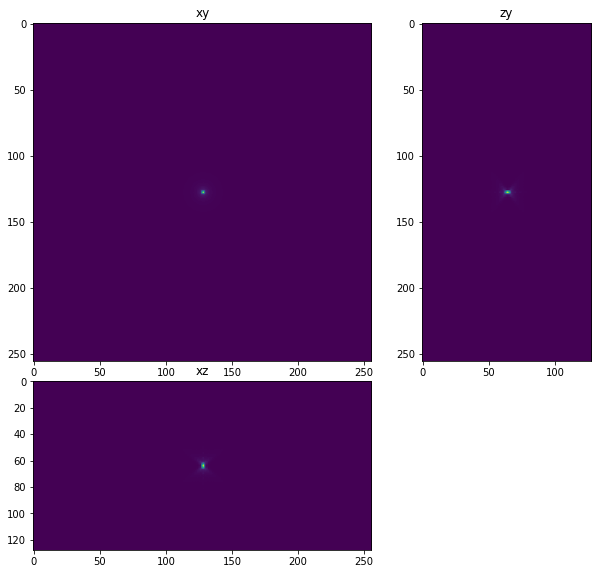

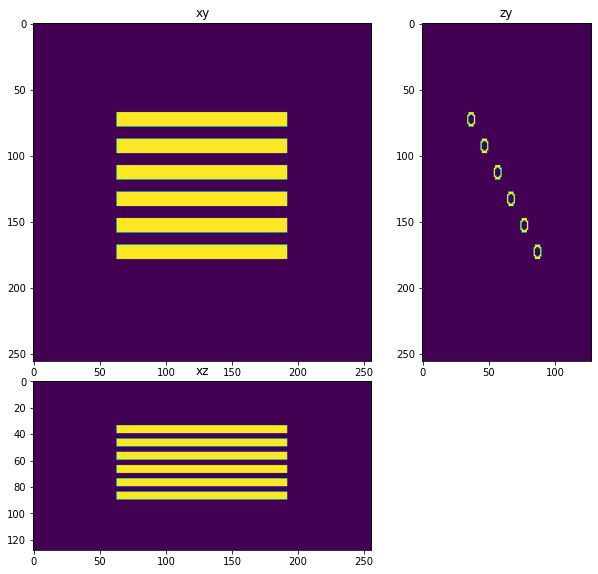

In [2]:
from tnia.plotting.projections import show_xyz_max, show_xyz_slice

fig=show_xyz_max(im)
fig=show_xyz_max(psf)
fig=show_xyz_max(truth)


## Import deconvolution libraries

Try imnporting the clij2 and redlionfish implementations of Richardson Lucy.  If they are found perform a deconvolution with each library

In [3]:
try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
    
except ImportError:
    clij2_rl_found=False
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
except ImportError:
    redlionfish_rl_found=False
    
print('clij2 rl found',clij2_rl_found)
print('redlionfish rl found',redlionfish_rl_found)    

clij2 rl found True
redlionfish rl found True


get lib


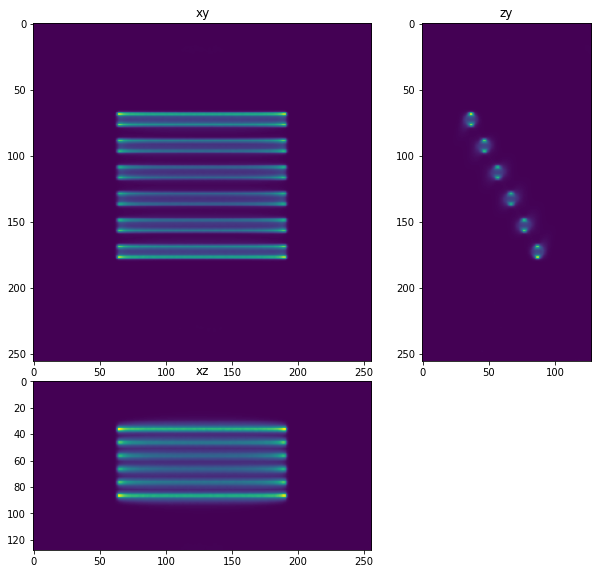

In [4]:
if clij2_rl_found==True:
    decon_clij2=richardson_lucy_nc(im,psf,100,0)
    fig=show_xyz_max(decon_clij2)

ERROR:root:Failed to setup Reikna with OpenCL.
ERROR:root:No module named 'reikna'


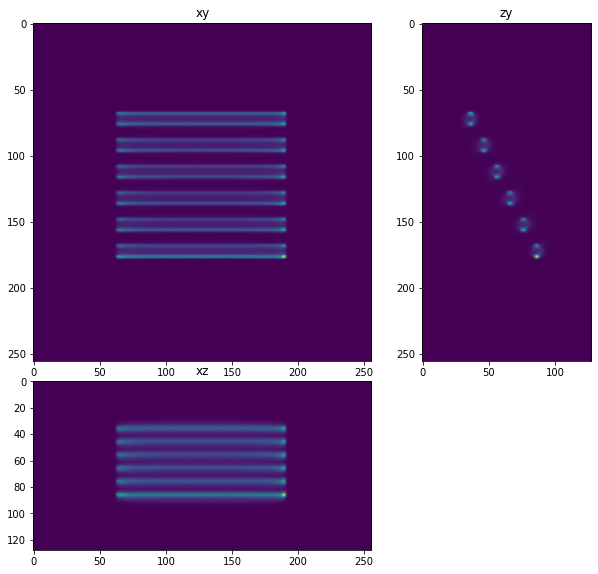

In [5]:
if redlionfish_rl_found==True:
    decon_rlf=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=100, method='gpu', resAsUint8=False )
    fig=show_xyz_max(decon_rlf)

## View data in Napari and ask questions

View the data in Napari, switch to a 3D view and rotate and explore the dataset?  How good is the reconstruction?  Is it a truer representation of the data as compared to the image?  

Excercise: Deconvolve the data for 1000 iterations, or 10,000 if you have a fast GPU (or even 100,000 if you have a fast GPU and a bit of time).  Does the reconstruction continue to improve with more iterations?

In [6]:
import napari
viewer=napari.Viewer()
viewer.add_image(im)
viewer.add_image(decon_clij2)
viewer.add_image(decon_rlf)
viewer.add_image(truth)

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\jupyter_client\threaded.py", line 122, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\asyncio\base_events.py", line 623, in ru

<Image layer 'truth' at 0x1d5bd96ceb0>